<a href="https://colab.research.google.com/github/Sankalpa0011/ANN-MNIST-Digit-Classification/blob/main/FFNN_MNIST_Digit_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Import Libraries**

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import cv2
from google.colab.patches import cv2_imshow
from PIL import Image

import tensorflow as tf
tf.random.set_seed(3) # for reproducibility
from tensorflow import keras
from keras.datasets import mnist
from tensorflow.math import confusion_matrix
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D
from keras.models import Sequential

In [2]:
# load the MNIST data from keras.datasets
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [3]:
type(x_train)

numpy.ndarray

In [4]:
# shape of the numpy arrays
print('x_train shape:', x_train.shape)   # 60000=record size / 28, 28=pixel sizes
print('y_train shape:', y_train.shape)
print('x_test shape:', x_test.shape)
print('y_test shape:', y_test.shape)

x_train shape: (60000, 28, 28)
y_train shape: (60000,)
x_test shape: (10000, 28, 28)
y_test shape: (10000,)


Training data = 60,000 Images <br>
Testing data = 10,000 Images <br>
Image dimension = 28 x 28 <br>
Channels = 1 Channel ( Gray Scale )

In [5]:
# print 11th image
print(x_train[10])

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0  42 118 219 166 118 118   6
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0 103 242 254 254 254 254 254  66
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0  18 232 254 254 254 254 254 238
   70   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0 104 244 254 224 254 254 254
  141   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0 207 254 210 25

In [6]:
print(x_train[10].shape)

(28, 28)


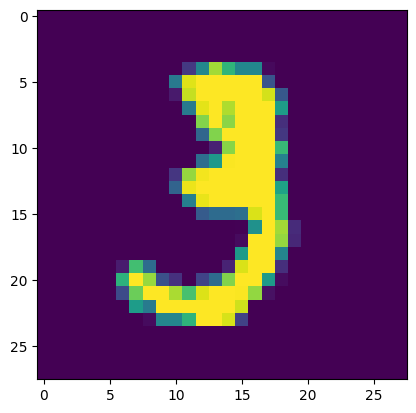

3


In [7]:
# display the image
plt.imshow(x_train[10])
plt.show()

# print the corressponding label
print(y_train[10])

### **Image Labels**

In [8]:
print(y_train.shape, y_test.shape)

(60000,) (10000,)


In [9]:
# unique values in y_train
print(np.unique(y_train))

# unique values in y_test
print(np.unique(y_test))

[0 1 2 3 4 5 6 7 8 9]
[0 1 2 3 4 5 6 7 8 9]


We can use these labes as such or can use also apply One Hot Encoding

All the image have same dimensions in the dataset, if not we have to resize all the images to a commom dimension

## **Normalization**

In [10]:
x_train = x_train / 255
x_test = x_test / 255

In [11]:
print(x_train[10])

[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.    

## **Neural Network Architecture**

In [12]:
# setup the layers of the neural network
"""model = Sequential()

model.add(Flatten(input_shape=(28, 28)))
model.add(Dense(32, activation='relu'))
model.add(Dense(16, activation='relu'))
model.add(Dense(10, activation="sigmoid")) """

# Model architecture
model = Sequential([
    Flatten(input_shape=(28, 28)),
    Dense(512, activation='relu'),
    Dropout(0.2),
    Dense(512, activation='relu'),
    Dropout(0.2),
    Dense(256, activation='relu'),
    Dropout(0.2),
    Dense(10, activation='softmax')
])

# compile
model.compile(optimizer="adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"])

# summary
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 512)               401920    
                                                                 
 dropout (Dropout)           (None, 512)               0         
                                                                 
 dense_1 (Dense)             (None, 512)               262656    
                                                                 
 dropout_1 (Dropout)         (None, 512)               0         
                                                                 
 dense_2 (Dense)             (None, 256)               131328    
                                                                 
 dropout_2 (Dropout)         (None, 256)               0

In [13]:
history = model.fit(x_train, y_train, epochs=20, validation_split=0.1)

Epoch 1/20
1688/1688 [==============================] - 37s 20ms/step - loss: 0.2511 - accuracy: 0.9233 - val_loss: 0.1151 - val_accuracy: 0.9652
Epoch 2/20
1688/1688 [==============================] - 24s 14ms/step - loss: 0.1252 - accuracy: 0.9640 - val_loss: 0.0832 - val_accuracy: 0.9758
Epoch 3/20
1688/1688 [==============================] - 24s 14ms/step - loss: 0.0985 - accuracy: 0.9706 - val_loss: 0.0795 - val_accuracy: 0.9785
Epoch 4/20
1688/1688 [==============================] - 23s 14ms/step - loss: 0.0826 - accuracy: 0.9749 - val_loss: 0.0753 - val_accuracy: 0.9793
Epoch 5/20
1688/1688 [==============================] - 26s 16ms/step - loss: 0.0718 - accuracy: 0.9788 - val_loss: 0.0744 - val_accuracy: 0.9797
Epoch 6/20
1688/1688 [==============================] - 26s 15ms/step - loss: 0.0648 - accuracy: 0.9813 - val_loss: 0.0817 - val_accuracy: 0.9775
Epoch 7/20
1688/1688 [==============================] - 25s 15ms/step - loss: 0.0565 - accuracy: 0.9826 - val_loss: 0.1190 -

## **Model Evaluation**

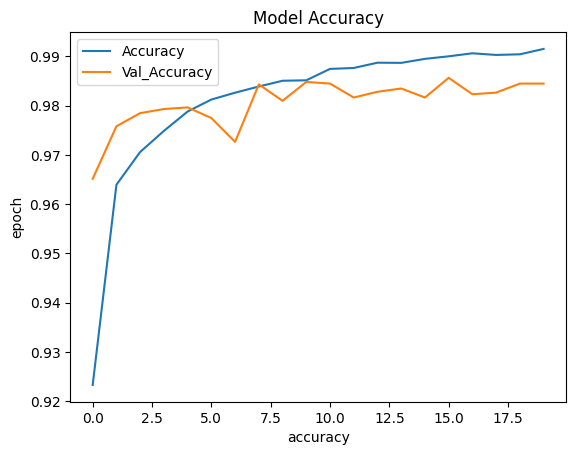

In [14]:
# Visualizing the accuracy
plt.plot(history.history["accuracy"], label="Accuracy")
plt.plot(history.history["val_accuracy"], label="Val_Accuracy")
plt.title("Model Accuracy")
plt.xlabel("accuracy")
plt.ylabel("epoch")
plt.legend()
plt.show()

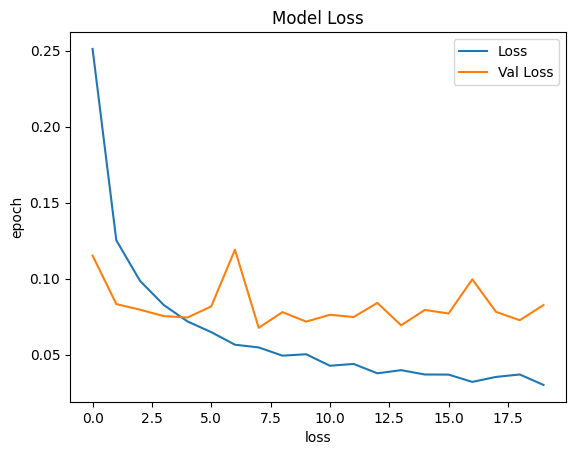

In [15]:
# Visualizing the loss
plt.plot(history.history["loss"], label="Loss")
plt.plot(history.history["val_loss"], label="Val Loss")
plt.title("Model Loss")
plt.xlabel("loss")
plt.ylabel("epoch")
plt.legend()
plt.show()

In [16]:
# test data accuracy
loss, accuracy = model.evaluate(x_test, y_test)

313/313 [==============================] - 1s 4ms/step - loss: 0.1144 - accuracy: 0.9805


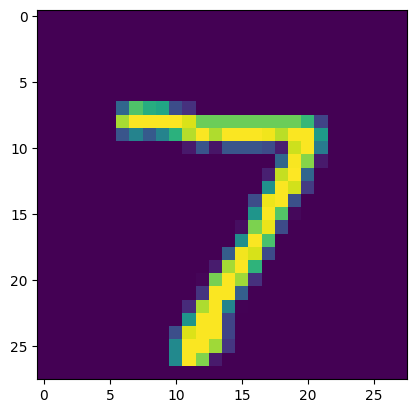

7


In [17]:
# first data point in x_test
plt.imshow(x_test[0])
plt.show()

print(y_test[0])

## **Predictions**

In [18]:
y_pred = model.predict(x_test)  # give the prediction probabilities of each class for that data point
y_pred.shape

313/313 [==============================] - 2s 5ms/step


(10000, 10)

In [19]:
print(y_pred[0])

[0.0000000e+00 3.1038146e-25 5.2789364e-19 1.4353571e-19 7.3106020e-24
 6.7482712e-30 0.0000000e+00 9.9999994e-01 8.8191889e-29 1.3369933e-17]


In [20]:
label_for_first_image = np.argmax(y_pred[0])
print(label_for_first_image)

7


In [21]:
# convert the prediction probabilities to class label for all test data points
y_pred_labels = [np.argmax(i) for i in y_pred]
print(y_pred_labels)

[7, 2, 1, 0, 4, 1, 4, 9, 5, 9, 0, 6, 9, 0, 1, 5, 9, 7, 3, 4, 9, 6, 6, 5, 4, 0, 7, 4, 0, 1, 3, 1, 3, 4, 7, 2, 7, 1, 2, 1, 1, 7, 4, 2, 3, 5, 1, 2, 4, 4, 6, 3, 5, 5, 6, 0, 4, 1, 9, 5, 7, 8, 9, 3, 7, 4, 6, 4, 3, 0, 7, 0, 2, 7, 1, 7, 3, 2, 9, 7, 7, 6, 2, 7, 8, 4, 7, 3, 6, 1, 3, 6, 9, 3, 1, 4, 1, 7, 6, 9, 6, 0, 5, 4, 9, 9, 2, 1, 9, 4, 8, 7, 3, 9, 7, 4, 4, 4, 9, 2, 5, 4, 7, 6, 7, 9, 0, 5, 8, 5, 6, 6, 5, 7, 8, 1, 0, 1, 6, 4, 6, 7, 3, 1, 7, 1, 8, 2, 0, 9, 9, 9, 5, 5, 1, 5, 6, 0, 3, 4, 4, 6, 5, 4, 6, 5, 4, 5, 1, 4, 4, 7, 2, 3, 2, 7, 1, 8, 1, 8, 1, 8, 5, 0, 8, 9, 2, 5, 0, 1, 1, 1, 0, 9, 0, 3, 1, 6, 4, 2, 3, 6, 1, 1, 1, 3, 9, 5, 2, 9, 4, 5, 9, 3, 9, 0, 3, 6, 5, 5, 7, 2, 2, 7, 1, 2, 8, 4, 1, 7, 3, 3, 8, 8, 7, 9, 2, 2, 4, 1, 5, 9, 8, 7, 2, 3, 0, 2, 4, 2, 4, 1, 9, 5, 7, 7, 2, 8, 2, 5, 8, 5, 7, 7, 9, 1, 8, 1, 8, 0, 3, 0, 1, 9, 9, 4, 1, 8, 2, 1, 2, 9, 7, 5, 9, 2, 6, 4, 1, 5, 8, 2, 9, 2, 0, 4, 0, 0, 2, 8, 4, 7, 1, 2, 4, 0, 2, 7, 4, 3, 3, 0, 0, 3, 1, 9, 6, 5, 2, 5, 9, 7, 9, 3, 0, 4, 2, 0, 7, 1, 1, 2, 1, 

y_test --> True labels <br>
y_pred --> Predicted labels

### **Confusion Matrix**

In [22]:
confusion_matrix(y_test, y_pred_labels)

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 973,    1,    0,    0,    1,    0,    3,    1,    1,    0],
       [   0, 1127,    4,    1,    0,    1,    2,    0,    0,    0],
       [   4,    0, 1015,    1,    1,    0,    2,    5,    3,    1],
       [   0,    0,    5,  984,    0,    5,    0,    6,    4,    6],
       [   2,    1,    5,    0,  961,    0,    3,    2,    0,    8],
       [   2,    0,    0,    8,    1,  868,    4,    1,    5,    3],
       [   5,    4,    0,    0,    4,    3,  942,    0,    0,    0],
       [   2,    0,    5,    0,    1,    0,    0, 1014,    1,    5],
       [   3,    1,    3,    5,    3,    3,    2,    6,  945,    3],
       [   4,    4,    2,    3,    7,    1,    0,   10,    2,  976]],
      dtype=int32)>

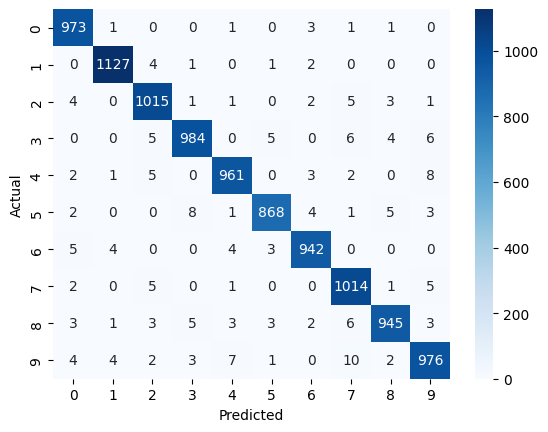

In [23]:
sns.heatmap(confusion_matrix(y_test, y_pred_labels), annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

## **Predictive System**

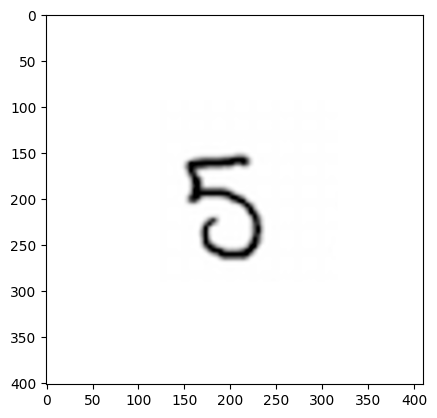

In [24]:
input_image_path = "/content/5.png"

input_img = cv2.imread(input_image_path)
plt.imshow(input_img)
plt.show()

In [25]:
type(input_img)

numpy.ndarray

In [26]:
print(input_img)

[[[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 ...

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]]


In [27]:
input_img.shape

(402, 410, 3)

In [28]:
grayscale = cv2.cvtColor(input_img, cv2.COLOR_RGB2GRAY)
grayscale.shape

(402, 410)

In [29]:
input_img_resize = cv2.resize(grayscale, (28, 28))
input_img_resize.shape

(28, 28)

In [30]:
cv2_imshow(input_img_resize)

In [31]:
# normalization
input_img_resize = input_img_resize/255

In [32]:
# reshape
img_reshaped = np.reshape(input_img_resize, [1, 28, 28])
img_reshaped.shape

(1, 28, 28)

In [33]:
input_prediction = model.predict(img_reshaped)
print(input_prediction)

1/1 [==============================] - 0s 25ms/step
[[9.9353068e-02 6.3404699e-14 9.0064603e-01 8.7344478e-07 2.7283115e-15
  1.2534877e-10 1.1330275e-11 5.4700568e-08 1.8879652e-08 1.2177529e-09]]


In [34]:
# find the label
input_pred_label = np.argmax(input_prediction)
print(input_pred_label)

2


## **Predictive System**

Enter the image path: /content/6.png


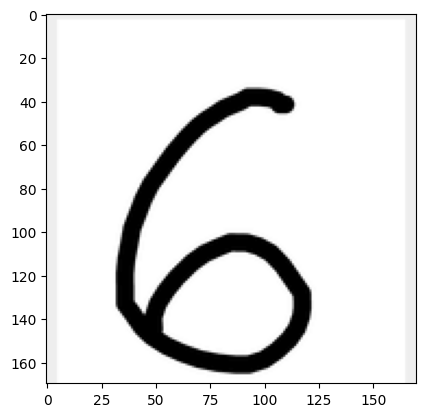

1/1 [==============================] - 0s 51ms/step
The Handwritten Digit is a  2


In [38]:
input_img_path = input("Enter the image path: ")
input_img = cv2.imread(input_img_path)

# Check if the image was loaded successfully
if input_img is None:
    print("Error: Could not load image. Please check the file path and try again.")
else:
    plt.imshow(input_img)
    plt.show()

    grayscale = cv2.cvtColor(input_img, cv2.COLOR_RGB2GRAY)
    input_img_resize = cv2.resize(grayscale, (28, 28))
    input_img_resize = input_img_resize/255
    img_reshaped = np.reshape(input_img_resize, [1, 28, 28])

    input_prediction = model.predict(img_reshaped)
    input_pred_label = np.argmax(input_prediction)
    print("The Handwritten Digit is a ", input_pred_label)